# Постройка диаграмм распределения 

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

print('Done!')

Done!


In [105]:
data = pd.read_csv('../test data.csv')

display(data.head(10))

,Date,Category,Age,Gender,Sessions,Users,Goals
0,2020-03-02,Prodazhi,25-34,female,22235,10504,185
1,2020-03-03,Prodazhi,25-34,female,20423,10425,181
2,2020-03-10,Prodazhi,25-34,female,19784,10167,205
3,2020-03-04,Prodazhi,25-34,female,19394,9917,174
4,2020-03-11,Prodazhi,25-34,female,18875,9813,214
5,2020-03-02,Buhgalterija-Upravlencheskij-uchet-Finansy-pre...,25-34,female,18187,8687,78
6,2020-03-05,Prodazhi,25-34,female,17747,9173,152
7,2020-03-02,Informacionnye-tehnologii-Internet-Telekom,25-34,male,17620,8735,85
8,2020-03-03,Informacionnye-tehnologii-Internet-Telekom,25-34,male,17532,8911,79
9,2020-03-23,Prodazhi,25-34,female,17330,8755,191


Судя по всему, в нашем распоряжении статистика посещений какого-то ресурса для создания резюме (hh?).

На примере индексов 0, 5, 7 убеждаемся что статистика не сгруппирована по дням и на один день может быть несколько записей с различными значениями Category или Age.

По условию задачи мы должны вывести графики распределения для начинающих карьеру студентов разделённых по полу, вопрос лишь в том - студент это категория, или возраст? Стоит проверить какие есть значения в Category

In [106]:
data['Category'].value_counts()

Juristy                                                     1092
Marketing-Reklama-PR                                        1092
Administrativnyj-personal                                   1092
Vysshij-menedzhment                                         1092
Nachalo-karery-Studenty                                     1092
Proizvodstvo                                                1092
Rabochij-personal                                           1092
Transport-Logistika                                         1092
Stroitelstvo-Nedvizhimost                                   1092
Informacionnye-tehnologii-Internet-Telekom                  1092
Prodazhi                                                    1092
Medicina-Farmacevtika                                       1092
Buhgalterija-Upravlencheskij-uchet-Finansy-predprijatija    1092
Banki-Investicii-Lizing                                     1091
Upravlenie-personalom-Treningi                              1091
Iskusstvo-Razvlechenija-M

Как мы видим у нас действительно есть категория Nachalo-karery-Studenty, значит в первую очередь надо сформировать подвыборку содержащую только записи об этой категории, а также заранее разделим на подвыборки мужчин и женщин

In [144]:
final_data = data.loc[data['Category'] == 'Nachalo-karery-Studenty']

subsample_male = final_data.loc[final_data['Gender'] == 'male']
subsample_female = final_data.loc[final_data['Gender'] == 'female']

display(subsample_male.head())
display(subsample_female.head())

,Date,Category,Age,Gender,Sessions,Users,Goals
162,2020-03-02,Nachalo-karery-Studenty,25-34,male,8180,4269,162
183,2020-03-03,Nachalo-karery-Studenty,25-34,male,7818,4312,192
203,2020-03-10,Nachalo-karery-Studenty,25-34,male,7427,4076,141
207,2020-03-04,Nachalo-karery-Studenty,25-34,male,7345,3966,153
213,2020-03-11,Nachalo-karery-Studenty,25-34,male,7196,3948,169


,Date,Category,Age,Gender,Sessions,Users,Goals
132,2020-03-02,Nachalo-karery-Studenty,25-34,female,8805,4514,142
152,2020-03-10,Nachalo-karery-Studenty,25-34,female,8353,4607,182
159,2020-03-03,Nachalo-karery-Studenty,25-34,female,8206,4488,154
177,2020-03-04,Nachalo-karery-Studenty,25-34,female,7937,4337,122
182,2020-03-11,Nachalo-karery-Studenty,25-34,female,7878,4389,162


Посмотрим статистику и можно переходить непосредственно к просмотру распределений

In [145]:
print(subsample_male['Goals'].describe(), '\n')
print(subsample_female['Goals'].describe())

count    546.000000
mean      51.569597
std       51.531052
min        0.000000
25%       11.000000
50%       26.500000
75%       82.750000
max      217.000000
Name: Goals, dtype: float64 

count    546.000000
mean      57.012821
std       50.988052
min        1.000000
25%       16.000000
50%       36.500000
75%       89.000000
max      220.000000
Name: Goals, dtype: float64


Видим что не смотря на то что в начале у нас было по 120-180 созданий резюме в месяц - на деле, в 50% случаев их количество было меньше 32

Теперь можно рисовать распределения, здесь снова используем final_data для наглядности результата

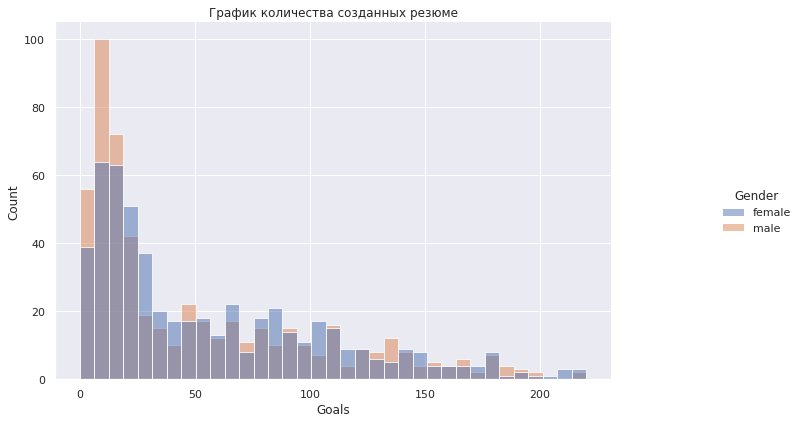

In [149]:
g = sns.displot(final_data, x="Goals", bins=35, hue="Gender")
#plot settings
g.axes.flatten()[0].set_title("График количества созданных резюме")
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

Тут стоит пояснить что вообще в итоге получилось - график говорит нам о том, что чаще всего в день на ресурсе с которого взяты данные, в категории без опыта, создаётся 20-40 резюме (в зависимости от пола).

Тем не менее, судя по графику - довольно часто резюме женщин больше чем резюме мужчин, об этом также говорит нам describe, медианное значение количества резюме для женщин скошено аж на 10 вправо.

P.S. По заданию тут нужно было сделать 2 разных графика, но я осмелился отклониться так как если эти данные реализовать на одном графике получается намного нагляднее

# Прогнозирование объёма трафика на следующий месяц

У нас уже выгружены данные, поэтому можно не загружать заново, а работать с тем что уже есть

In [171]:
it_subsample = data.copy().loc[data['Category'] == 'Informacionnye-tehnologii-Internet-Telekom']
it_subsample['Date'] = pd.to_datetime(it_subsample['Date'])

data_month = it_subsample.set_index('Date').resample('MS').sum()

display(data_month)

,Sessions,Users,Goals
Date,,,
2020-03-01,868535,482177,6240
2020-04-01,259864,191035,5228
2020-05-01,271439,197740,5678


Данных и признаков слишком мало чтобы применить машинное обучение, а жаль, я бы повыпендривался. 

Думаю тут можно обойтись взвешенным средним, так как использовать признаки Users и Goals нет смысла так как они не являются фактически наблюдаемыми и в рамках временного ряда становятся нам известны либо одновременно с сессиями, либо позже.

In [187]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

print('Количество сессий на следующий месяц на основе взвешенного среднего:', int(weighted_average(data_month.Sessions, [0.2, 0.3, 0.5])))

Количество сессий на следующий месяц на основе взвешенного среднего: 387385


Для более качественного прогноза в первую очередь нужно количественно больше данных: это позволило бы нам определить есть ли сезонность и применить её для прогнозирования, а также позволило бы сгенерировать новые признаки такие как лаг или скользящее среднее.

Однозначно хотелось бы больше признаков, скажем, может быть: количество активных рекламных компаний (их бюджет?), количество обращений в тех. поддержку, 